Daten importieren aus Excel
------

In [5]:
import pandas as pd

data_input = pd.read_excel('../data/raw/U bung kNN Klassifizierung Ecoli.xlsx', sheet_name=0)
data_output = pd.read_excel('../data/raw/U bung kNN Klassifizierung Ecoli.xlsx', sheet_name=1)

In [6]:
data_output

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.79,0.36,0.48,0.5,0.46,0.82,0.70
1,0.36,0.54,0.48,0.5,0.41,0.38,0.46
2,0.60,0.61,0.48,0.5,0.54,0.67,0.71
3,0.71,0.71,0.48,0.5,0.68,0.43,0.36


Train und Test Datensätze erstellen, normalisieren und kNN-Classifier trainieren
---------

In [3]:
X = data_input.loc[:,data_input.columns != "Target"]
y = data_input["Target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #, random_state=0)

In [4]:
data_input

,mcg,gvh,lip,chg,aac,alm1,alm2,Target
0,0.44,0.52,0.48,0.5,0.43,0.47,0.54,im
1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
...,...,...,...,...,...,...,...,...
328,0.69,0.39,0.48,0.5,0.57,0.76,0.79,im
329,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp
330,0.52,0.54,0.48,0.5,0.62,0.76,0.79,im
331,0.74,0.74,0.48,0.5,0.31,0.53,0.52,pp


In [33]:
#Normalisieren der Daten
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=7)
knnclf.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=7)

Test Datensätze erstellen und kNN-Classifier verwenden
---------

In [35]:
X_output = data_output

In [36]:
y_pred = knnclf.predict(X_output)

In [37]:
#Normalisieren der Daten
X_output_norm = scaler.transform(X_output)
y_pred_norm = knnclf.predict(X_output_norm)

In [38]:
print(X_output)
print(y_pred)
print(X_output_norm)
print(y_pred_norm)

    mcg   gvh   lip  chg   aac  alm1  alm2
0  0.79  0.36  0.48  0.5  0.46  0.82  0.70
1  0.36  0.54  0.48  0.5  0.41  0.38  0.46
2  0.60  0.61  0.48  0.5  0.54  0.67  0.71
3  0.71  0.71  0.48  0.5  0.68  0.43  0.36
['imU' 'cp' 'im' 'pp']
[[0.88764045 0.15789474 0.         0.         0.53488372 0.86813187
  0.74468085]
 [0.40449438 0.39473684 0.         0.         0.47674419 0.38461538
  0.4893617 ]
 [0.6741573  0.48684211 0.         0.         0.62790698 0.7032967
  0.75531915]
 [0.79775281 0.61842105 0.         0.         0.79069767 0.43956044
  0.38297872]]
['imU' 'cp' 'im' 'om']


Akkuranz bestimmen
----------------

In [39]:
score = knnclf.score(X_test,y_test)
print('knn-Classifier scores with {}% accuracy'.format(score*100))

knn-Classifier scores with 85.07462686567165% accuracy


Optimalen k-wert bestimmen
---------------

y_pred = knnclf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [17]:
import matplotlib.pyplot as plt
import numpy as np
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm, y_train)
    pred_i = knn.predict(X_test_norm)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

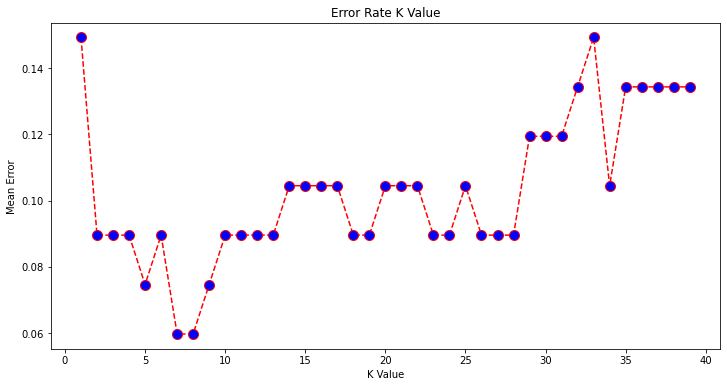

In [276]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Decision Tree
----------

In [265]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, criterion="entropy", min_samples_split=2)
dt.fit(X_train,y_train)
from sklearn.tree import DecisionTreeClassifier

score = dt.score(X_test,y_test)
print('Decision Tree scores with {}% accuracy'.format(score*100))

Decision Tree scores with 71.64179104477611% accuracy


In [251]:
from sklearn.model_selection import GridSearchCV

#tree parameters which shall be tested
tree_para = {'criterion':['gini','entropy'],'max_depth':[i for i in range(1,20)], 'min_samples_split':[i for i in range (2,20)]}

#GridSearchCV object
grd_clf = GridSearchCV(dt, tree_para, cv=5)

#creates differnt trees with all the differnet parameters out of our data
grd_clf.fit(X_train, y_train)

#best paramters that were found
best_parameters = grd_clf.best_params_  
print(best_parameters) 

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
